# **EDA and Feature Engineering in Practice: Flight Price Dataset**

#### this data containe 11 columns:

- Aireline: the name of the airline
- Date_of_Journey: the date of the journey
- Source: the source of the flight
- Destination: the destination of the flight
- Route: the route of the flight
- Dep_Time: the departure time
- Arrival_Time: the arrival time
- Duration: the duration of the flight
- Total_Stops: the number of stops
- Additional_Info: additional information
- Price: the price of the flight

Let's start by loading and examining the dataset to understand its structure, including its columns, data types, and any missing values. Then, we'll proceed with exploratory data analysis (EDA), feature engineering

In [171]:
import pandas as pd 
# to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# load the flight price dataset 
df = pd.read_excel('../Data/flight_price.xlsx')
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [173]:
print(df.shape)

(10683, 11)


- as `Route` column can give us the number of stop in that flight and we already have that column so let's drop it 
- handling missing values 
- handling duplicate values
- convert the `Date_of_Journey`, `Dep_Time`, and `Arrival_Time` columns to datetime format
- extract the hours, minutes, day, month, and year from the `Date_of_Journey, Dep_Time, and Arrival_Time` columns
- convert the `Duration` column to duration in hours and minutes and then calculate the total duration in minutes
- Drop the original `Date_of_Journey, Dep_Time, Arrival_Time, Duration` columns
- then we need to perform categorical encoding on the `Airline, Source, Destination, Route, Additional_Info` columns
- we can plot the distribution plot for the price 
- after that let's understand the correlation 

In [174]:
# drop the Route column
df = df.drop('Route', axis=1)
# calculate the number of missing values in each column
df.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

there is only one missing value in 'Total_stops' columns so let's drop the row with the missing value, we will just remove one row from the dataset

In [175]:
cols = ['Total_Stops']
df = df.dropna(subset=cols)

print(df.duplicated().sum())

220


In [176]:
# we have 220 duplicated rows in the dataset and because we have a large dataset, we can drop the duplicated rows
df = df.drop_duplicates()

In [177]:
#count the number of unique values in each column
encoded_col = ['Airline', 'Source', 'Destination', 'Additional_Info','Total_Stops']
for col in encoded_col:
    print(col, df[col].nunique())

Airline 12
Source 5
Destination 6
Additional_Info 10
Total_Stops 5


in all of this columns, we have a small number of unique values, so we can use one-hot encoding to encode them

In [178]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

df['Year_of_Journey'] = df['Date_of_Journey'].dt.year
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day


df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_minute'] = df['Dep_Time'].dt.minute


# in the Arrival_Time column we have also the month and day of the arrival time, so let's keep only the hour and minute
df['Arrival'] = pd.to_datetime(df['Arrival_Time'].str.split(' ').str[0])
df['Arrival_hour'] = df['Arrival'].dt.hour 
df['Arrival_minute'] = df['Arrival'].dt.minute


#convert the duration column to numerical format (hours and minutes)
df['Duration_hours'] = df['Duration'].str.extract('(\d+)h').astype('float')
df['Duration_minutes'] = df['Duration'].str.extract('(\d+)m').astype('float')
# then we need to fill the missing values with 0
df['Duration_hours'] = df['Duration_hours'].fillna(0)
df['Duration_minutes'] = df['Duration_minutes'].fillna(0)

# total duration in minutes
df['Total_duration_minutes'] = df['Duration_hours'] * 60 + df['Duration_minutes']

# drop the columns that we have already extracted the information from
df = df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time','Arrival', 'Duration'], axis=1)

# handling categorical values 
df_encoded = pd.get_dummies(df, columns = encoded_col, drop_first = True)


In [179]:
print(f'There are {df_encoded.shape[0]} rows and {df_encoded.shape[1]} columns in the cleaned dataset')

There are 10462 rows and 44 columns in the cleaned dataset


**EDA**


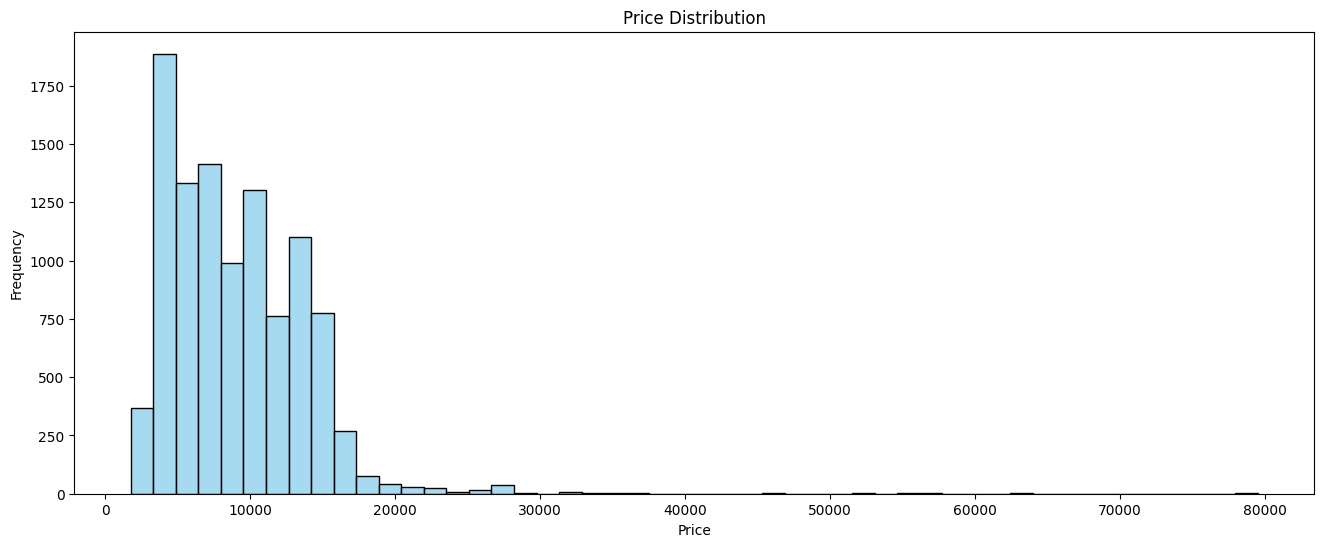

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
# first let's check the distribution of the target variable

plt.figure(figsize=(16,6))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
sns.histplot(df_encoded['Price'], bins=50, color='skyblue')
plt.show()

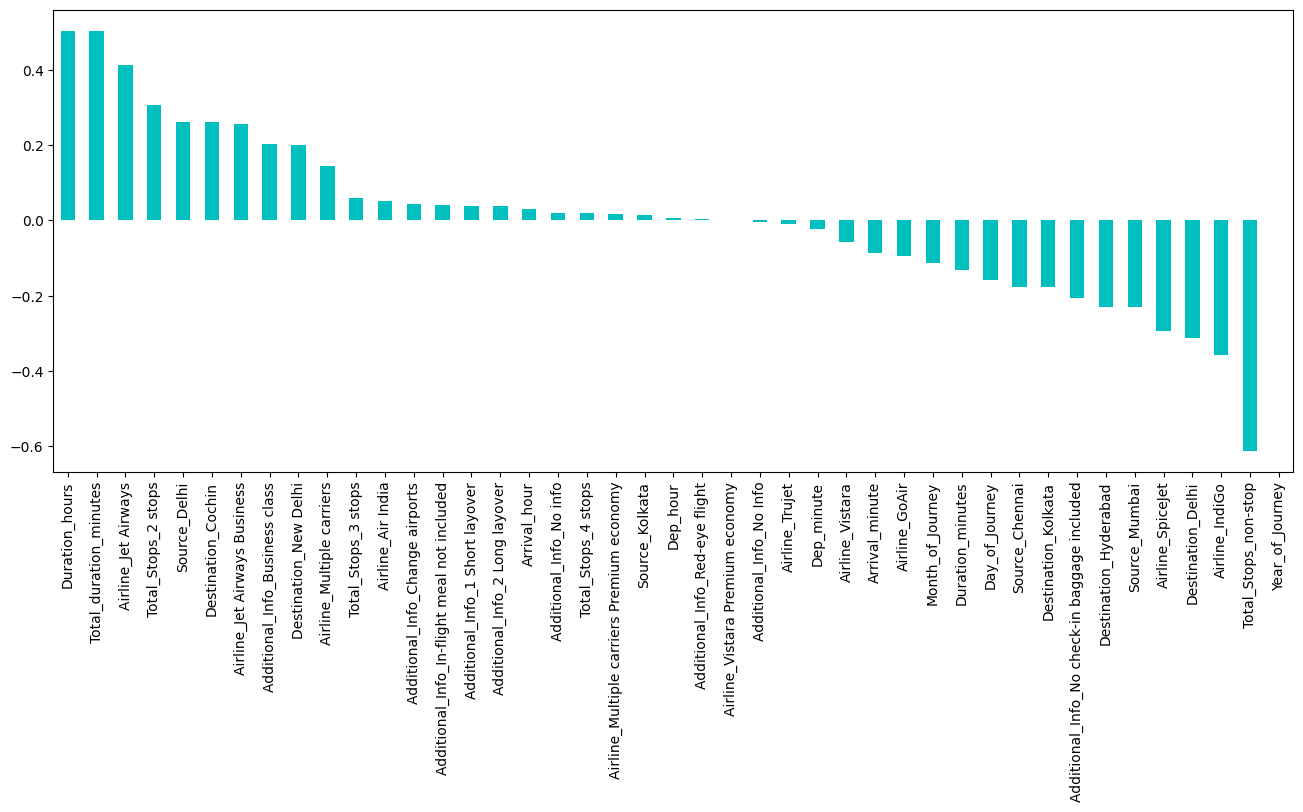

In [181]:
# now let's plot the different ways to plot the correlation between the features and the target variabl
# method 1

plt.figure(figsize=(16,6))
df_encoded.corr()['Price'].sort_values(ascending=False).drop('Price').plot(kind='bar', color='c')
plt.show()

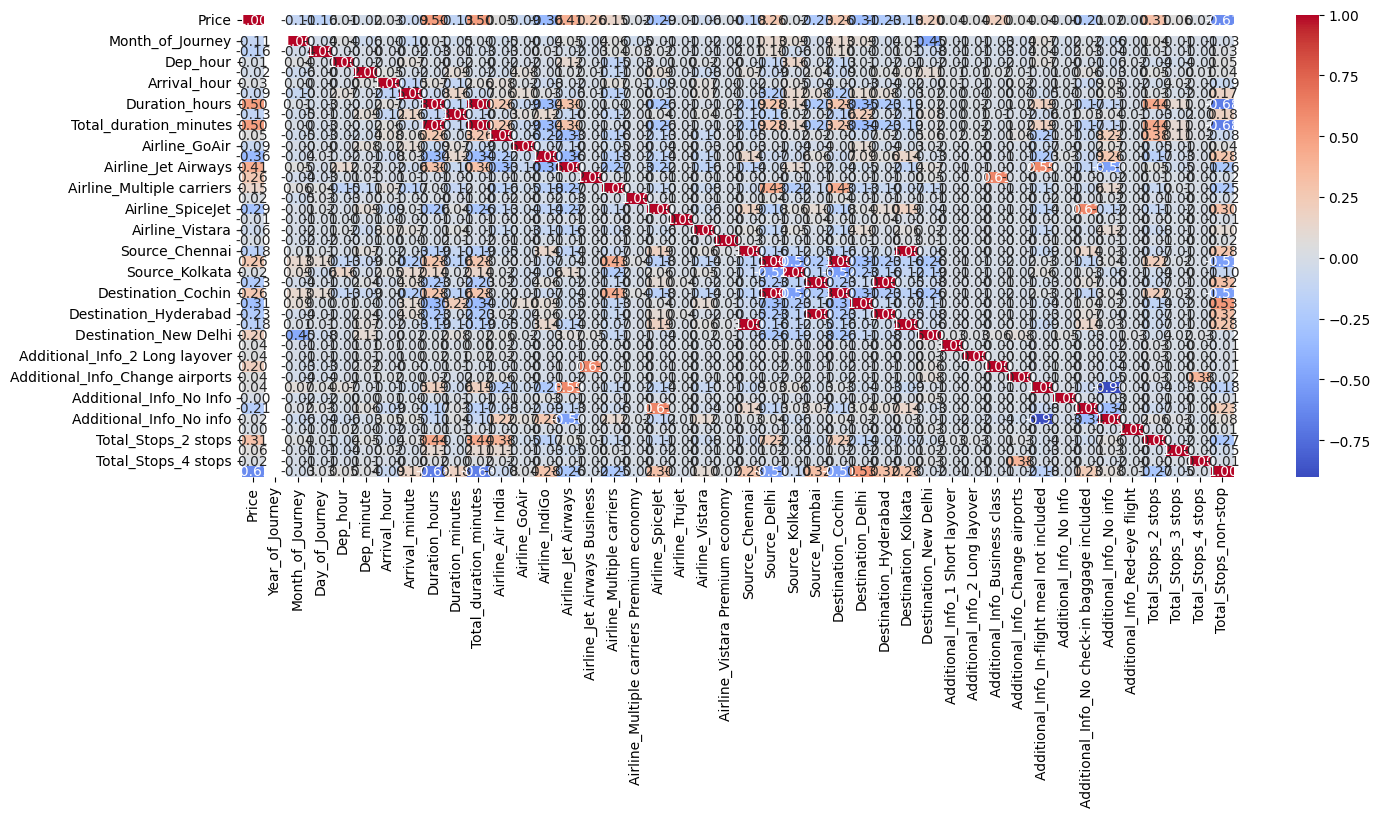

In [182]:

# method 2
plt.figure(figsize=(16,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [183]:

# method 3
plt.figure(figsize=(16,6))
corr = df_encoded[df_encoded.columns].corr()['Price'].sort_values(ascending=False)
corr = corr.to_frame()
corr.style.background_gradient(cmap='coolwarm')
plt.show()


<Figure size 1600x600 with 0 Axes>

the process is long and we can do a lot of feature engineering to improve the model performance for example we can perform feature scaling, feature selection, and select the feature importance using different techniques. 

In [184]:
# model building

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 674.637606678001
Mean Squared Error: 2203834.638754724
R^2 Score: 0.8943018980271258


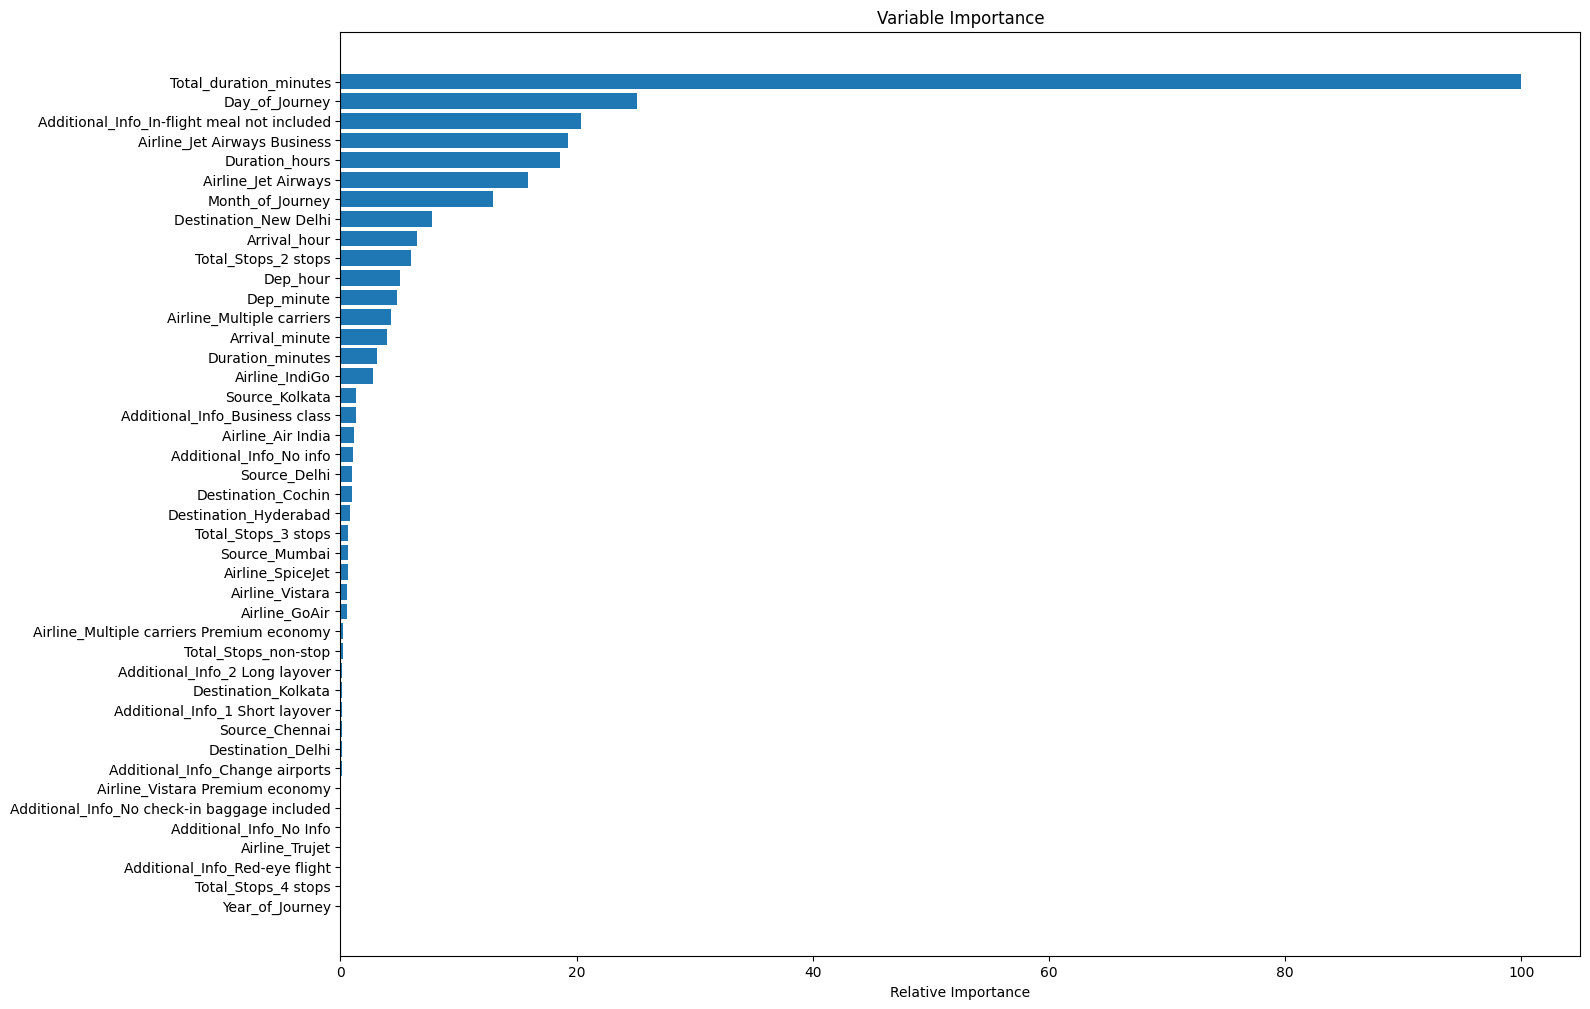

In [185]:
# we can get the feature importance from the model and plot them 
import numpy as np
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
